<a href="https://colab.research.google.com/github/saadatjalil281/Machine-Learning/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification using Scikit Learn
1. Visulationzation of Data
2. Preprocessing of Data
3. Model Fitting using Scikit Learn
4. Model Evaluation
5. Result Analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings
import warnings
# Set the warnings filter to ignore futureWarning
warnings.simplefilter(action = 'ignore', category = FutureWarning)

##import the Data
Let's extract the our Titanic data from the .csv file, create a pandas DataFrame and look at the available indicators:

* **Survived:** Outcome of survival (0 = No; 1 = Yes)

* **Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)

* **Name:** Name of passenger

* **Sex:** Sex of the passenger

* **Age:** Age of the passenger (Some entries contain NaN)

* **SibSp:** Number of siblings and spouses of the passenger aboard

* **Parch:** Number of parents and children of the passenger aboard

* **Ticket:** Ticket number of the passenger
* **Fare:** Fare paid by the passenger
* **Cabin:** Cabin number of the passenger(Some entries contain NaN)
* **Embarked:** Port of embarkation of the passenger(c = Cherbourg; Q = Queenstown; S= Southampton)


In [ ]:
full_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
full_data.shape

(891, 12)

In [ ]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Distribution plots
Distribution of data is the foremost thing that we need to understand while analysing the data. Here, we will see how seaborn helps us in understanding the distribution of our data.

###distplot

The distplot() function provides the most convenient way to take a quick look at univariate distribution. This function will plot a histogram that fits the kernel density estimation(KDE) of the data.

Now let's plot the histogram of Number of parents and children of the passenger aboard(parch)

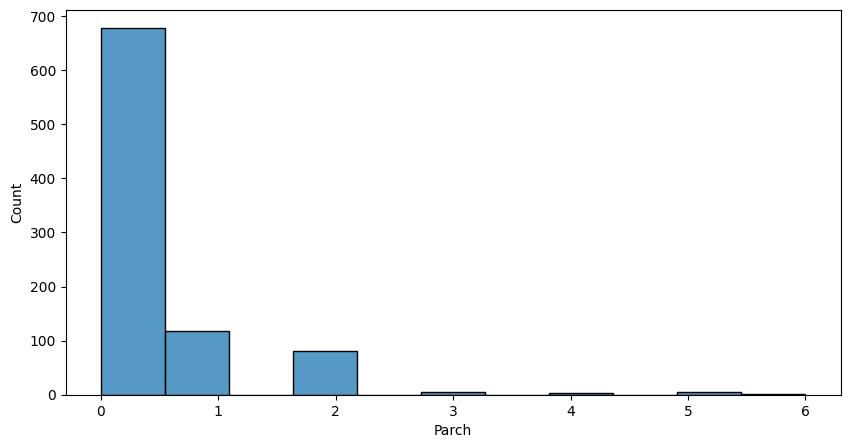

In [ ]:
sns.histplot(full_data['Parch'], kde = False)
plt.show()

###kdeplot
**Kernel Density Estimation (KDE)** is a way to estimate the probability density function of a continuous random variable. It is used for non-parametric analysis. Setting the hist flag to False in distplot will yield the KDE plat. For bivariate distribution, we can plot a kde by using jointplot(). Pass value 'kde to the parameter kind to plot kernel plot.

**Note:** distplot(data) is used to visualize the **parametric distribution** of data. It plot both KDE and histogram on the same figure.

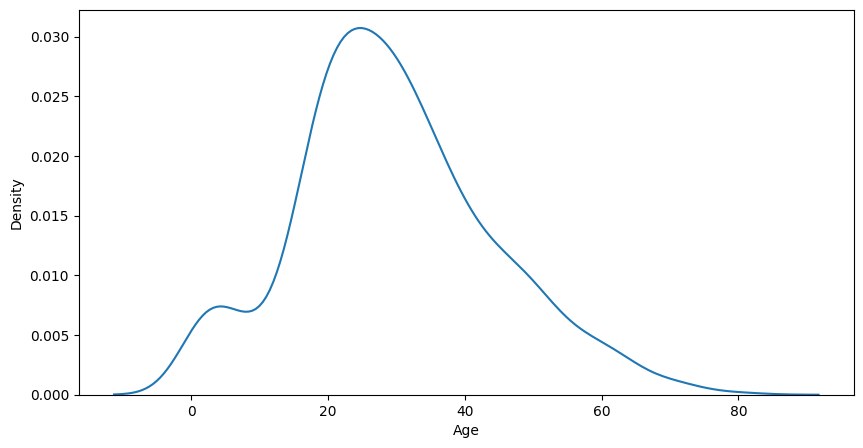

In [ ]:
sns.distplot(full_data['Age'], hist = False)
plt.show()

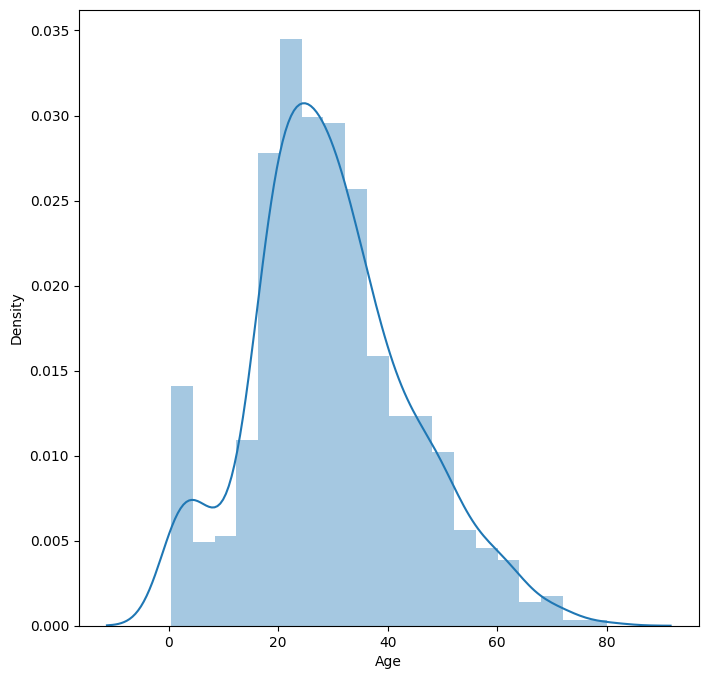

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(full_data['Age'])
plt.show()

##Relational plots

###relplot

Figure-level interface for drawing relational plots onto a FacetGrid.

The function relplot() is named that way because it is designed to visualize many different statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter to let you easily switch to this alternate representation

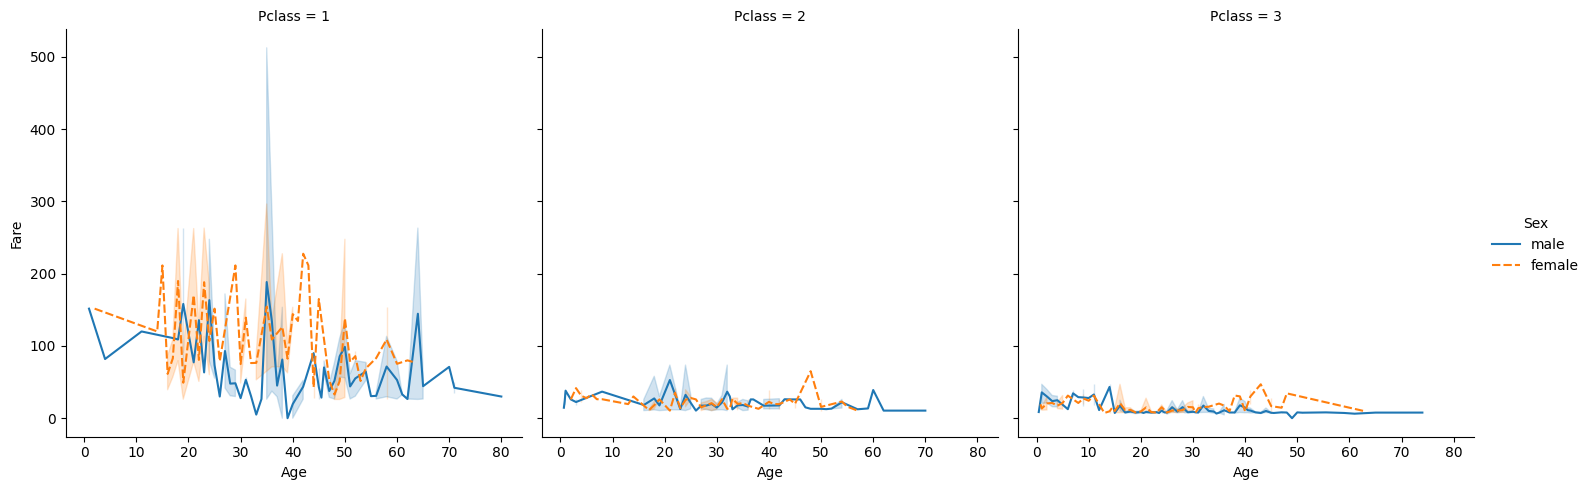

In [ ]:
sns.relplot(x = 'Age', y = 'Fare', col = 'Pclass', hue = 'Sex', style = 'Sex', kind = 'line', data = full_data)
plt.show()

## Scatterplot
**Scatter plot** is the most convenient way to visualize the distribution where each obervation is represented in two-dimensional plot via x ans y axis.  

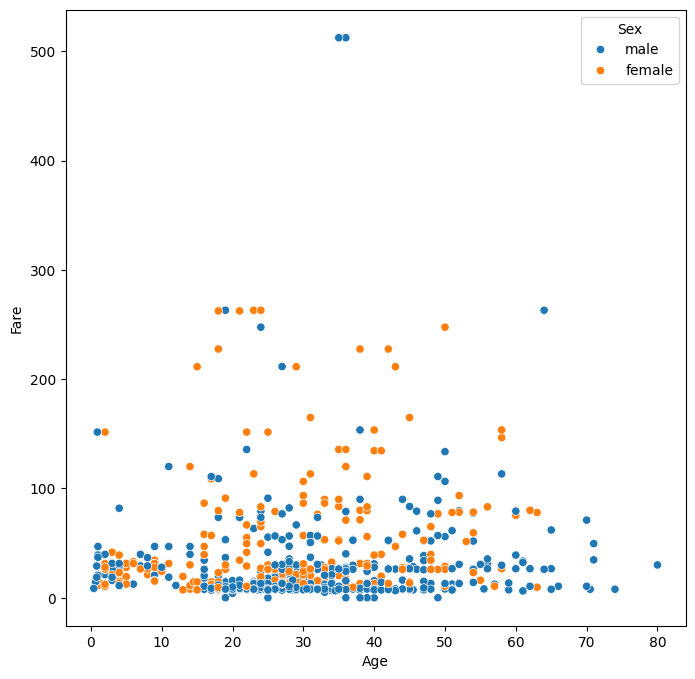

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Age', y = 'Fare', hue = 'Sex', data= full_data)
plt.show()

##lineplot

Draw a line plot with possibility of several semantic groupings

The relationship between and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (ie both **hue** and **style** for the same variable) can be helpful for making graphics more accessible.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent "numeric" or "categorical data in particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular "ticks" with values that may or may not exist in the data. This behavior can be controlled through various parametera

By default, the plot aggregates over multiple y values at each value of and shows an estimate of the central tendency and a confidence interval for that estimate

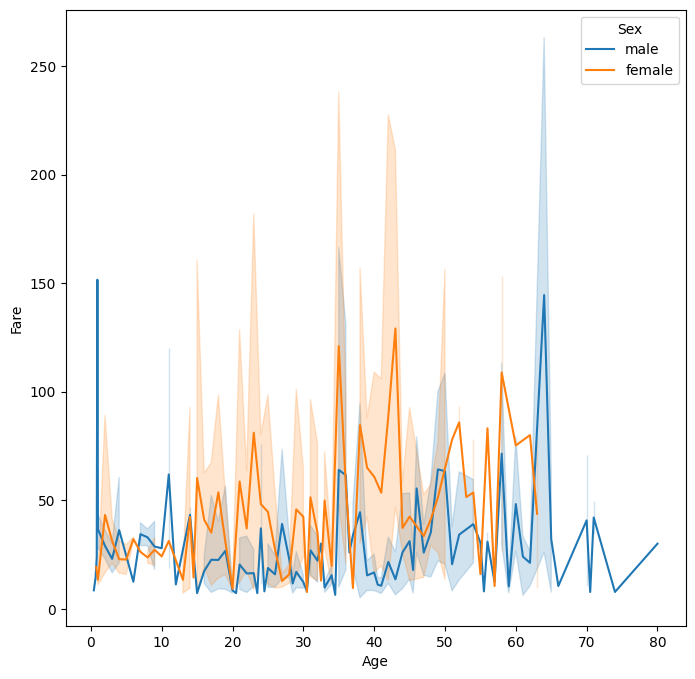

In [ ]:
plt.figure(figsize = (8,8))
sns.lineplot(x = 'Age', y = 'Fare', hue = 'Sex', data = full_data)
plt.show()

## Categorical Plot
when one or both variable under study are categorical, we use plots like striplot() and swarmplot(), etc. Seaborn provides interface to do so.

# barplot
The barplot() **shows the relation between a categorical variable and a contineous variable.** the data represented in rectangular bars where the lengh bar represent the proposition of the data  in that category. **Bar plot** represents the estimate of **central tendency.**

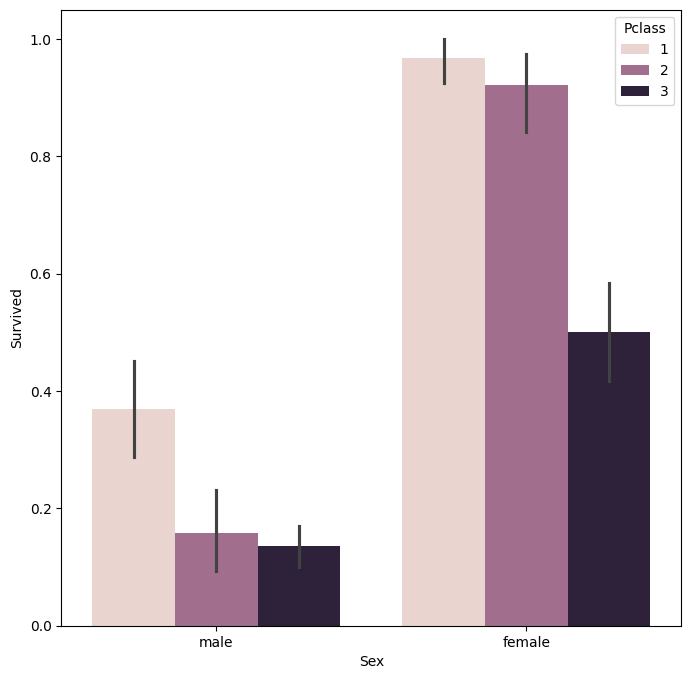

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = full_data)
plt.show()

**As we can see more women survived than men.**

## Stripplot
stripplot()is used when one the variable under study is categorical. it represents the data in sorted order along any one of the axis.

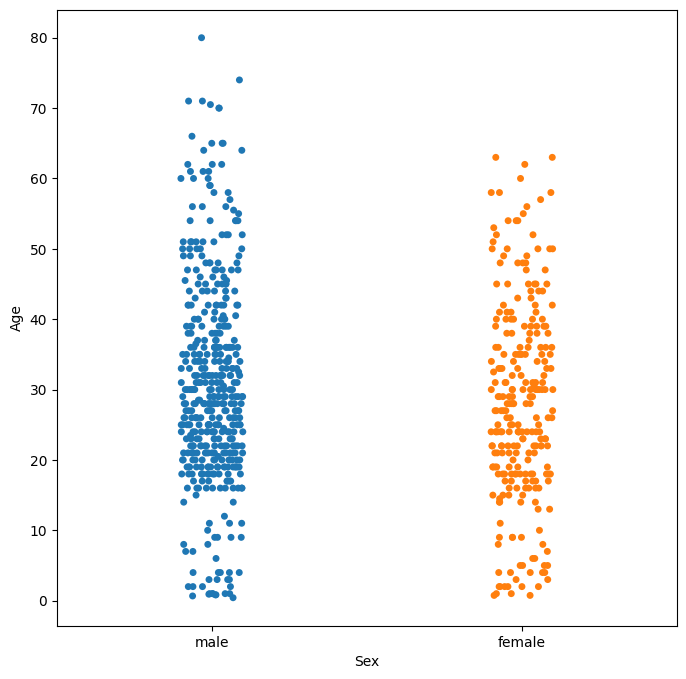

In [ ]:
plt.figure(figsize = (8,8))
sns.stripplot(x = 'Sex', y = 'Age', hue = 'Sex', data = full_data)
plt.show()

## swarmplot
this function position each point of scatter plot on the categorical axis and there by avoids overlapping points.

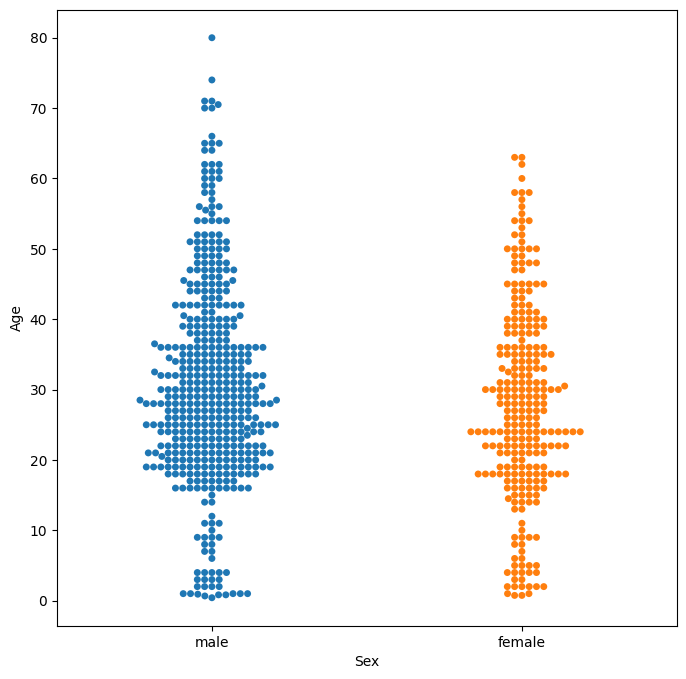

In [ ]:
plt.figure(figsize = (8,8))
sns.swarmplot(x = 'Sex', y = 'Age', hue = 'Sex', data = full_data)
plt.show()

##boxplot
Boxplot is a convenient way to visualize the distribution of data through their quartiles. Box plots usually have vertical lines extending from t boxes which are termed as whiskers. These whiskers indicate variability outside the upper and lower quartiles, hence Box Plots are also term as box-and-whisker plot and box-and-whisker diagram. Any Outliers in the date are plotted as individual points.

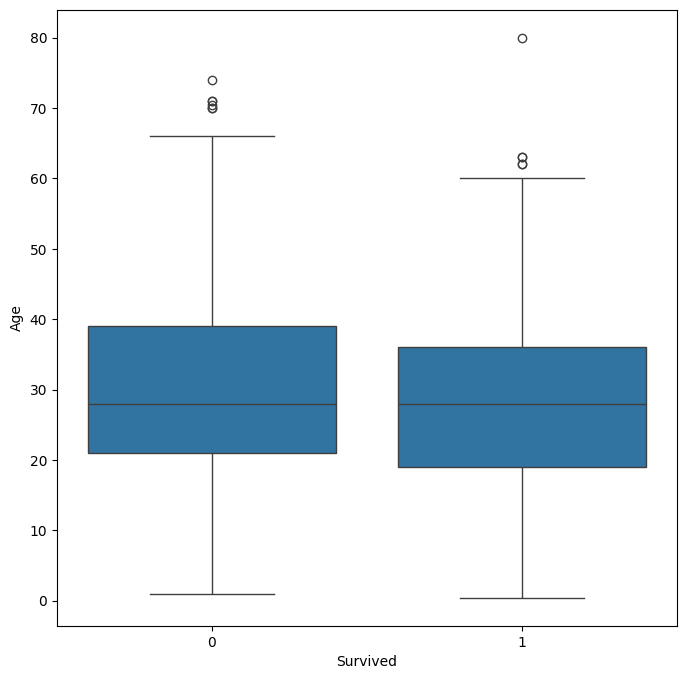

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Survived', y = 'Age', data = full_data)
plt.show()

##violinplot
Violin Plots are a combination of the box plot with the kernel density estimates. So, these plots are easier to analyze and understand the distribution of the data.

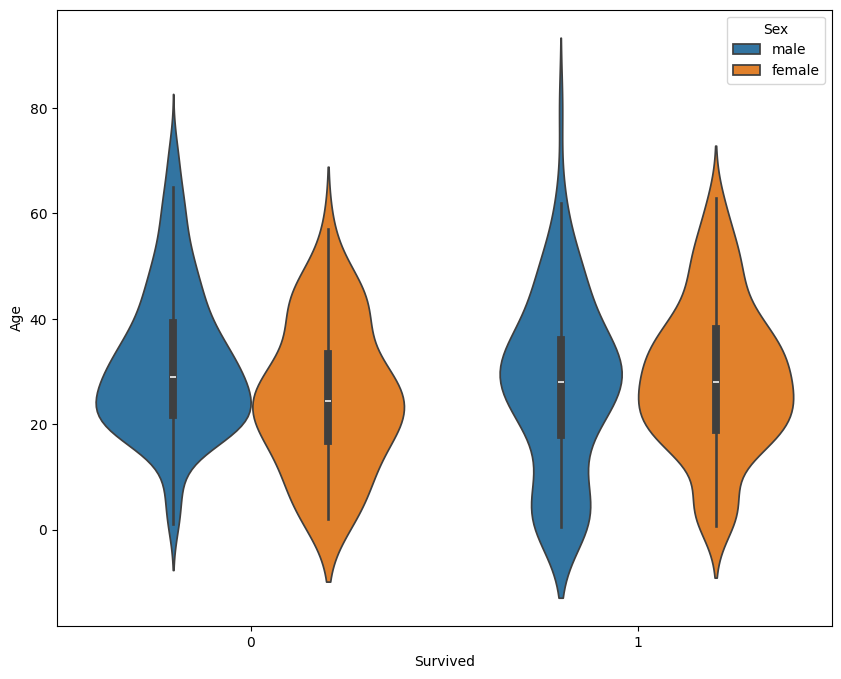

In [ ]:
  plt.figure(figsize = (10,8))
  sns.violinplot(x= 'Survived', y = 'Age', hue = 'Sex', data = full_data)
  plt.show()

##countplot
A special case in barplot is to show the no of observations in each category rather than computing a statistic for a second variable. For this we use count plot()

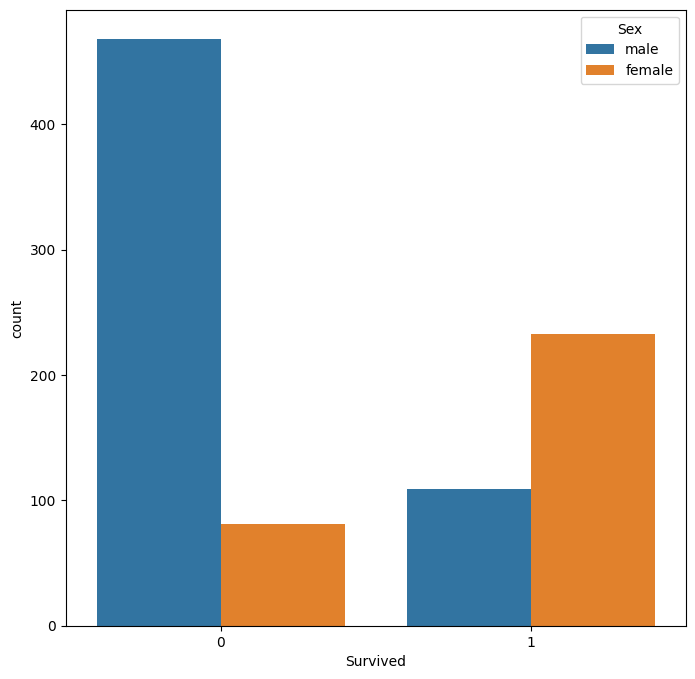

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Survived', hue = 'Sex', data = full_data)
plt.show()

##pointplot
Point plots serve same as bar plots but in a different style. Rather than the full bar, the value of the estimate is represented by the point at a certain height on the other axis.




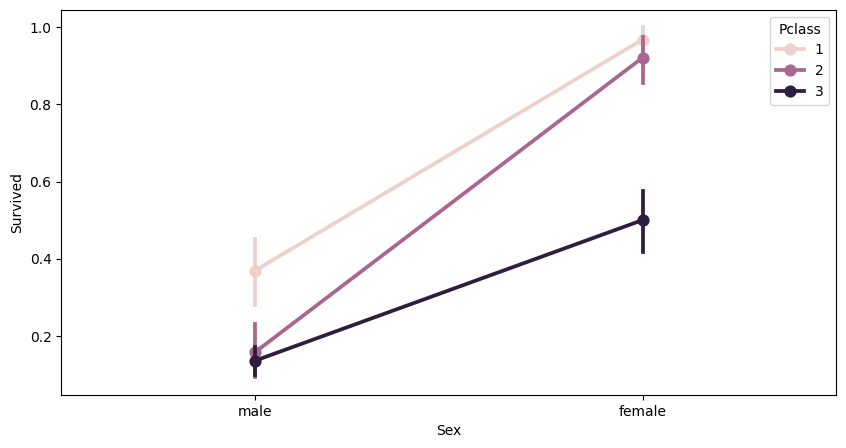

In [ ]:
sns.pointplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = full_data)
plt.show()

**We can see the average number of survivals of male and female in each class. From the plot we can understand that more number of females survived than males. in both males and females more number of survivals are from first class.**

##Regression plots

Most of the times, we use datasets that contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. This can be done through the regression lines.

While building the regression models, we often check for multicollinearity, where we had to see the correlation between all the combinations of continuous variables and will take necessary action to remove multicollineanty if exists.

There are two main functions in Seaborn to visualize a linear relationship determined through regression. These functions are regplot() and

Implot()

of Al Dep..

<>

5.1. Implot

Implot has data as a required parameter and the x and y variables must be specified as strings. This data form at is called "long-form"data

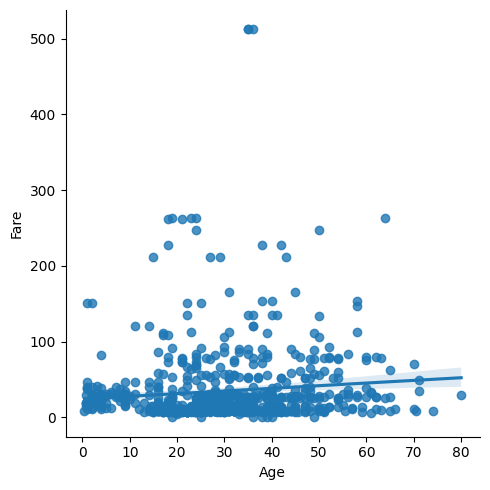

In [ ]:
sns.lmplot(x = 'Age', y = 'Fare', data = full_data)
plt.show()

#**TRAINING DATA PRE-PROCESSING**
The first step in machine learning pipline is to clean and transform data into useable format for analysis and modeling. As such data pre-processing addresses.
* Assumptions about data shape
* incorrect data types
* outliers or errors
* Missing values
* Categorical variables



In [ ]:
full_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
print('Train data:', full_data.shape)

Train data: (891, 12)


In [ ]:
full_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Data Cleaning
Missing Data

From the entry totals above, there appears to be missing data. A heatmap will help better visualize what features as missing the most information.

The 'Age' variable is missing roughly 20% of its data. This proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values). However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0.

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However, we can be smarter about this and check the average age by passenger class.

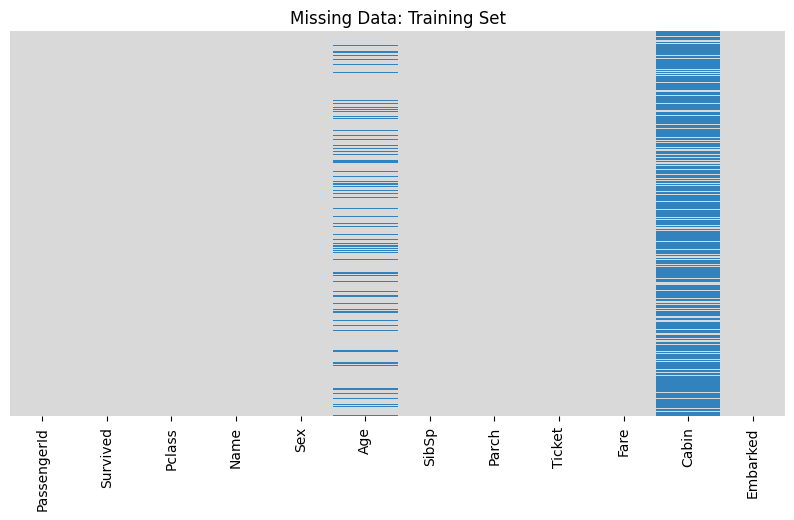

In [ ]:
sns.heatmap(full_data.isnull(), yticklabels = False, cbar = False,cmap ='tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

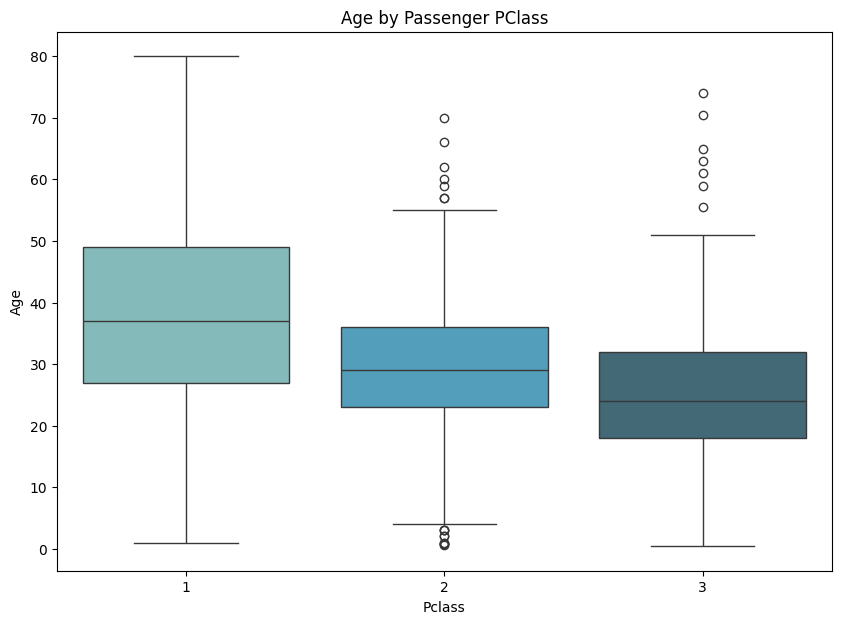

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = full_data, palette= 'GnBu_d').set_title('Age by Passenger PClass')
plt.show()

**Naturally,** the wealthier passenger in the higher classses tend to be older. We'll use these avg age values to impute based on Pclass for Age.

In [ ]:
# imputation function
def impute_age(cols):
  Age = cols[0]
  Pclass = col[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
        return 24
  else:
    return Age
  # Apply the function to the Age column
  full_data['Age'] = full_data[['Age', 'Pclass']].apply(impute_age, axis = 1)
  return full_data


The cabin column column has too many missing values to do anything useful with, so it would be best to remove it form the data frame altogether.

In [ ]:
# Remove Cabin feature
full_data.drop('Cabin', axis = 1, inplace = True)

Since there is only one missing value in Embarked, That observation can just be removed.

In [ ]:
# Remove rows with missing data
full_data.dropna(inplace = True)

Name and ticket can be removed from the dataset as these features do not provide additional information about a passenger's likelihood of survival.
the remaining non-null objects, Sex and embarked , will need to be specified as categories for better analysis results downstream.

In [ ]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
# Remove unnecessary columns
full_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

# Convet objects to category data type
object = ['Sex', 'Embarked']

for colname in object:
  full_data[colname] = full_data[colname].astype('category')

In [ ]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# Numaric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


passenger Id can be removed form dataset because it doesnot add any useful information in predicting a passenger's survial the remain variable are correct data type.

In [ ]:
# Remove Passenger Id
full_data.drop('PassengerId', axis = 1, inplace = True)

#**GETTING MODEL READY**

Now we have explored the data, it's a time to get these features 'model ready' categorial feature will need be converted into 'dummy variables' otherwise a machine learning algorithm will not be able to take in those features as inpus.

In [ ]:
# shape of train data
full_data.shape

(712, 8)

In [ ]:
# identify categorical features
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
# Covert  categorial variable into 'dumy ' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first= True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True)


In [ ]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Add new dummy columns to data frames
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [ ]:
# Drop unecessary columns
full_data.drop(['Sex','Embarked'], axis = 1, inplace = True)
# Shape of train data
print('train_data shape', full_data.shape)

# Confirm changes
full_data.head()

train_data shape (712, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Now the train data is perfect for a machine learning  algorithm
* all the data is numeric
* everything is concatenated together


#**MACHINE LEARNING**
Next i will feed these features into various classification algo. to dertermine the best perfromance using simple framework **Split, Fit, Predict, Score It**

## **Target Variable Splitting**
we will split the full dataset into input and target variables. Input is also called **Feature variable**. and output refers to **Target Variable.**

In [ ]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1)

# create target variable
y = full_data['Survived'] # y is the column we're trying to predict

In [ ]:
x # x represents the features
x.shape

(712, 8)

In [ ]:
y # y represents the Targegt
y.shape

(712,)

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_tranform = pre_process.fit_transform(x)

In [ ]:
# use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)


In [ ]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
66,2,29.0,0,0,10.5000,False,False,True
813,3,6.0,4,2,31.2750,False,False,True
830,3,15.0,1,0,14.4542,False,False,False
741,1,36.0,1,0,78.8500,True,False,True
581,1,39.0,1,1,110.8833,False,False,False
...,...,...,...,...,...,...,...,...
98,2,34.0,0,1,23.0000,False,False,True
753,3,23.0,0,0,7.8958,True,False,True
724,1,27.0,1,0,53.1000,True,False,True
422,3,29.0,0,0,7.8750,True,False,True


In [ ]:
#y_train.shape
y_train

,Survived
66,1
813,0
830,1
741,0
581,1
...,...
98,1
753,0
724,1
422,0


In [ ]:
x_test


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
225,3,22.0,0,0,9.3500,True,False,True
449,1,52.0,0,0,30.5000,True,False,True
750,2,4.0,1,1,23.0000,False,False,True
261,3,3.0,4,2,31.3875,True,False,True
283,3,19.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...
230,1,35.0,1,0,83.4750,False,False,True
371,3,18.0,1,0,6.4958,True,False,True
700,1,18.0,1,0,227.5250,False,False,False
833,3,23.0,0,0,7.8542,True,False,True


In [ ]:
y_test

,Survived
225,0
449,1
750,1
261,1
283,1
...,...
230,1
371,0
700,1
833,0


##**LOGGISTIC REGRESSION**


###**Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()
# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

###**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
# prediction form the model
y_pred_log_reg = log_reg.predict(x_test)
# accuracy score of the model
print('Logistic Regression')
# Accuracy
print('--'* 30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100, 2)
print('Accuracy: ', log_reg_accuracy, '%')

Logistic Regression
------------------------------------------------------------
Accuracy:  81.12 %


##**Decision Tree**

###**Model Training**
####**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifer')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifer


DecisionTreeClassifier()

###**Model Evaluation**
####**Decision Tree Classifier**

In [ ]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)

# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'* 30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100, 2)
print('Accuracy: ', Dtree_accuracy, '%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy:  70.63 %


##**Random Forest**


###**Model Training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of the model
rfc = RandomForestClassifier()
# pass training data into model

rfc.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

###**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
# prediction form the model
y_pred_rfc = rfc.predict(x_test)

# Score It
print('Random Forest Classifier')
# Accuracy
print('--'* 30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100, 2)
print('Accuracy: ', rfc_accuracy, '%')

Random Forest Classifier
------------------------------------------------------------
Accuracy:  74.83 %


##**Gradient Bossting Classifier**

###**Model Training**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

###**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score
# prediction of the model
y_pred_gbc = gbc.predict(x_test)

#Score It
print('Gradient Boosting Classifier')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc)* 100,2)
print('Accuracy: ',gbc_accuracy, '%')

Gradient Boosting Classifier
------------------------------------------------------------
Accuracy:  81.82 %


In [ ]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree Classifier': Dtree_accuracy,
    'Random Forest Classifier': rfc_accuracy,
    'Gradient Boosting Classifier': gbc_accuracy
    }

# Sort the model in descending order based on their values (higer values first)
sorted_scores = sorted(model_scores.items(), key=lambda item: item[1], reverse = True)
# Display the ranking of the models
print('Model Rankings(Greater values are better): ')
for rank, (model_name, score) in enumerate(sorted_scores, start = 1):
  print(f'{rank}, {model_name}:{score}')


Model Rankings(Greater values are better): 
1, Gradient Boosting Classifier:81.82
2, Logistic Regression:81.12
3, Random Forest Classifier:74.83
4, Decision Tree Classifier:70.63
